In [43]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

# df = df.append(df1,ignore_index=True)

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [44]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

In [45]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [46]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [47]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print('Eigen Vectors:\n', eigen_vectors)
print('\nEigen Values:\n', eigen_values)

Eigen Vectors:
 [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]

Eigen Values:
 [1.3536065  0.94557084 0.77774573]


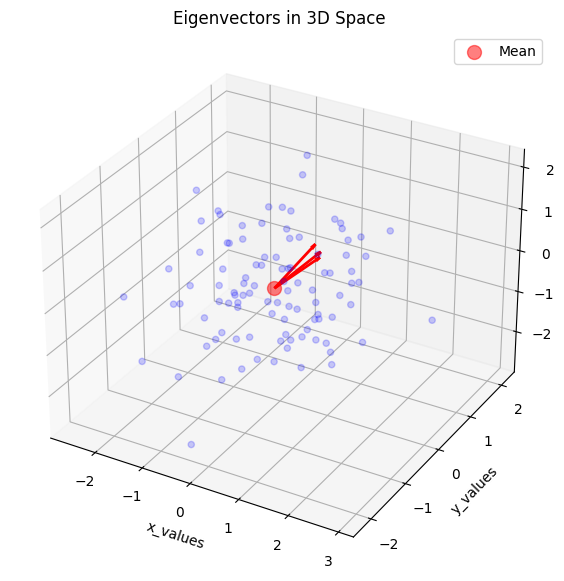

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data for 'data' (replace with your own)
data = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100)
})

# Assuming you have some calculated eigenvectors
# For demonstration, generating random eigenvectors
eigen_vectors = np.random.rand(3, 3)

# Calculate the mean of each feature for the origin of the arrows
mean_x = data['feature1'].mean()
mean_y = data['feature2'].mean()
mean_z = data['feature3'].mean()

# Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(data['feature1'], data['feature2'], data['feature3'], c='blue', marker='o', alpha=0.2)

# Plotting the mean point
ax.scatter(mean_x, mean_y, mean_z, color='red', s=100, label='Mean', alpha=0.5)

# Adding eigenvectors as arrows using quiver
for v in eigen_vectors.T:
    ax.quiver(mean_x, mean_y, mean_z, v[0], v[1], v[2], color='red', linewidth=2, arrow_length_ratio=0.1)

# Setting labels
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors in 3D Space')
plt.legend()
plt.show()

In [49]:
pc = eigen_vectors[0:2]
pc

array([[0.60202755, 0.15307346, 0.41201941],
       [0.48926036, 0.96242932, 0.73241009]])

In [50]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-1.376119,-3.092247,1
1,-0.087459,-0.722814,0
2,-0.281736,-0.526561,1
3,0.172834,-1.137114,1
4,-1.616144,-1.585945,1


In [51]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()